## Продолжим?

In [1]:
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

In [2]:
import warnings
pd.set_option("display.max_rows", 10)

from matplotlib import rcParams
rcParams.update({"figure.max_open_warning": 0,
                 "savefig.bbox": "tight"})

theme_set(theme_gray(base_size=12))

In [3]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


## Начнём с простого, со всевозможных подписей: к графикам, к осям, к значениям. Подписи добавляются с использованием функции labs(). Вот, например, заголовок графика:

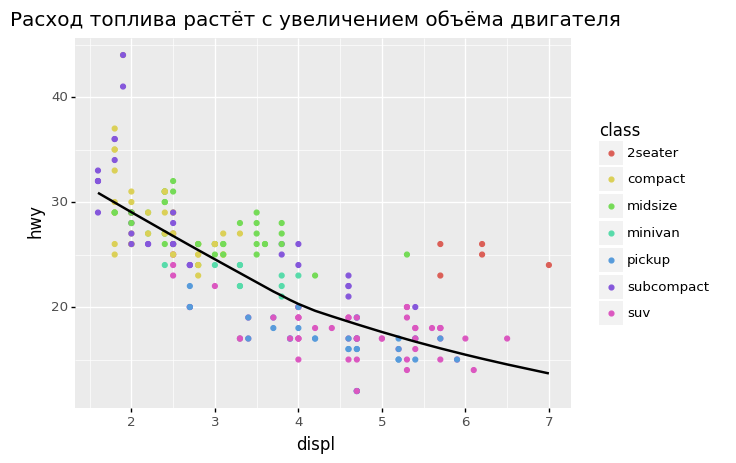

<ggplot: (-9223372036848577204)>

In [4]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth(se=False) +\
labs(title="Расход топлива растёт с увеличением объёма двигателя")

## Основной целью заголовка является обобщение основного результата наблюдения. Избегайте заголовков, которые просто описывают графики, например,  "Диаграмма зависимости расхода топлива от объёма двигателя".

## Также вы можете использовать labs() для задания названий осей и легенд. Как правило, хорошей идеей будет заменить формальные обозначения категорий на более развёрнутое их описание с указанием размерности (при необходимости).

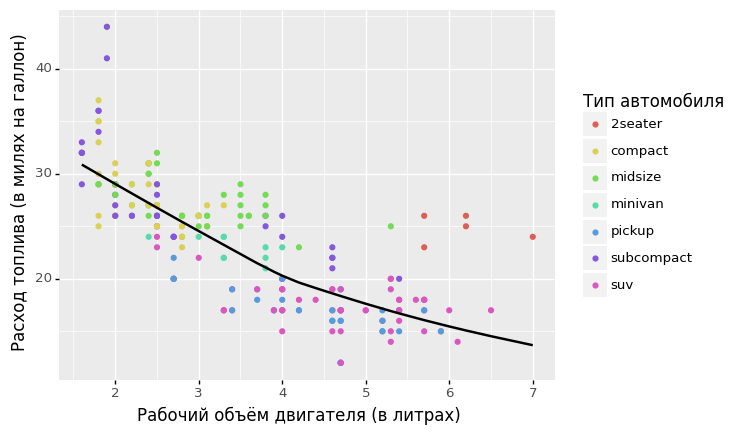

<ggplot: (-9223372036836785688)>

In [5]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
labs(x="Рабочий объём двигателя (в литрах)",
     y="Расход топлива (в милях на галлон)",
     colour="Тип автомобиля")

## Можно даже добавить математическое выражение вместо текстовых строк с помощью LaTeX:

In [7]:
# from matplotlib import rc
# rc('text', usetex=True)

# df = pd.DataFrame({"x": np.random.uniform(size=10),
#                    "y": np.random.uniform(size=10)})

# ggplot(df, aes("x", "y")) +\
# geom_point() +\
# labs(x="$\\sum_{i = 1}^n{x_i^2}$",
#      y="$\\alpha + \\beta + \\frac{\\delta}{\\theta}$")

## Не забудьте потом отключить эту опцию.

In [9]:
# rc('text', usetex=False)

### Создайте график на основе датафрейма mpg с заданными вручную заголовком, и осями x и y.

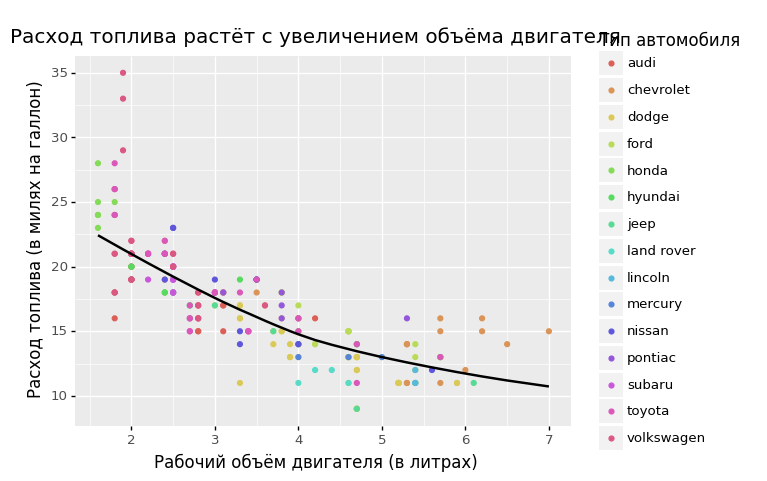

<ggplot: (-9223372036836561680)>

In [10]:
# Type your code here...

ggplot(mpg, aes("displ", "cty")) +\
geom_point(aes(colour="manufacturer")) +\
geom_smooth(se=False) +\
labs(x="Рабочий объём двигателя (в литрах)",
     y="Расход топлива (в милях на галлон)",
     title="Расход топлива растёт с увеличением объёма двигателя",
     colour="Тип автомобиля")

### Для одного из графиков, сформированных в прошлой лабораторной по собственным данным, придумайте название и подписи к осям.

In [34]:
# Type your code here...
df=pd.read_csv('data/heart.csv')
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1


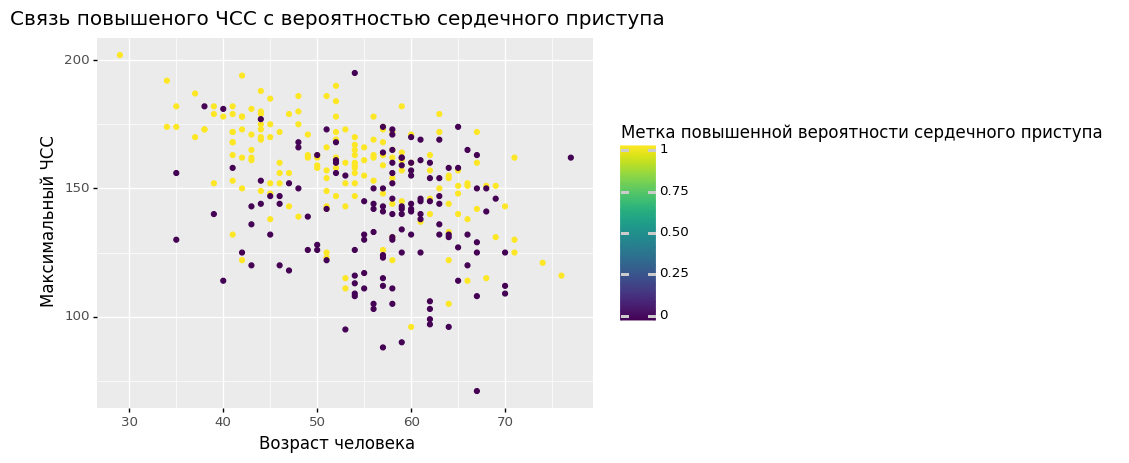

<ggplot: (-9223372036837219464)>

In [13]:
ggplot(data=df) +\
geom_point(mapping=aes(x="age", y="thalach", color="target")) +\
labs(x="Возраст человека",
     y="Максимальный ЧСС",
     title="Связь повышеного ЧСС с вероятностью сердечного приступа",
     colour="Метка повышенной вероятности сердечного приступа")

## Кроме основных элементов графика, можно подписывать и отдельные наблюдения. Сначала попробуем использовать geom_text(). У него все те же свойства, что у geom_point(), но добавляется свойство label.
## В качестве источника данных создадим датафрейм, в который поместим самую эффективную по расходу топлива марку автомобиля для каждого класса.

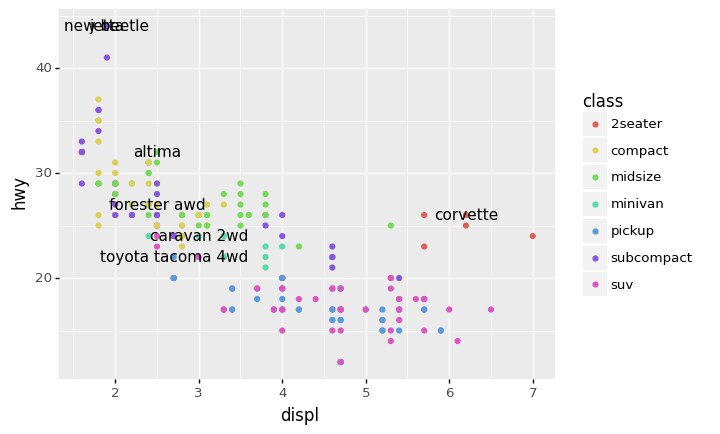

<ggplot: (-9223372036837209388)>

In [14]:
best_in_class = mpg\
.sort_values(by="hwy", ascending=False)\
.groupby("class")\
.first()

ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_text(aes(label="model"), data=best_in_class)

## Выглядит не очень. Текст перекрывает как сам себя, так и точки. Немного улучшить ситуацию можно заменив geom_text() на geom_label(), заодно добавив прозрачности и небольшой сдвиг по y.

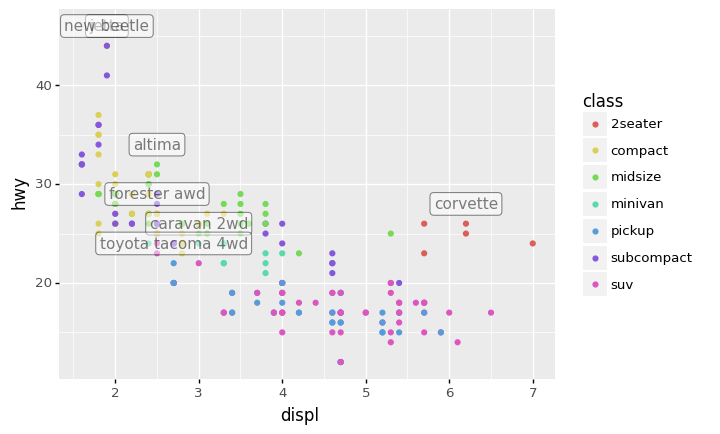

<ggplot: (-9223372036836563332)>

In [15]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_label(aes(label="model"), data=best_in_class, nudge_y=2, alpha=0.5)

## Стало лучше, но в верхнем левом углу надписи всё ещё перекрывают друг друга. Устранить это перекрытие, используя одинаковое смещение для всех текстовых блоков, не получится. К счастью, есть переменная adjust_text.

In [49]:
%pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=4c9f9c7a87b3af1888de194cf8cfe25615a1e931a051212b627d371089eaefb3
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built adjustText


In [18]:
# ggplot(mpg, aes("displ", "hwy")) +\
# geom_point(aes(colour="class")) +\
# geom_point(data=best_in_class, fill='none') +\
# geom_label(aes(label="model"), data=best_in_class, adjust_text={
#     'expand_points': (1.5, 1.5),
#     'arrowprops': {
#         'arrowstyle': '-'
#     }})

## Обратите внимание, что мы нарисовали большие чёрные точки поверх выделенных.

## Вместо легенды иногда можно использовать тот же приём. Это не очень приятно выглядит на конкретном графике, но вообще может быть полезным.

In [20]:
# class_avg = mpg\
# .groupby("class")["displ","hwy"].median()\
# .reset_index()

# ggplot(mpg, aes("displ", "hwy", colour="class")) +\
# geom_point() +\
# geom_label(aes(label="class"), data=class_avg, size=16, label_size=0, adjust_text={'expand_points': (0, 0)}) +\
# geom_point() +\
# theme(legend_position="none")

## На график можно добавить и простой фрагмент текста. Но для этого всё равно нужен будет DataFrame. 

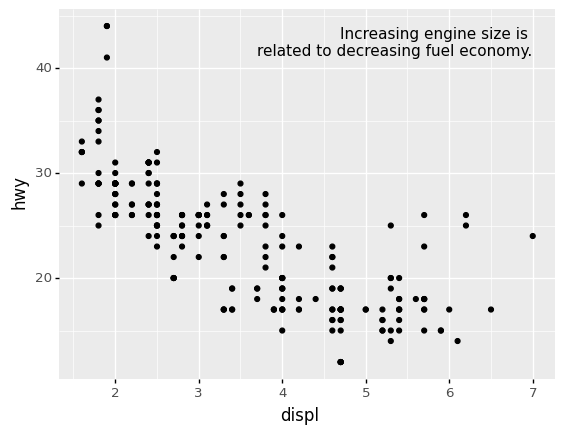

<ggplot: (-9223372036835538248)>

In [24]:
label = pd.DataFrame({"displ": [mpg.displ.max()],
                      "hwy": [mpg.hwy.max()],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

## Чтобы поместить текст в самый край нужно будет использовтаь `+np.Inf` и `-np.Inf`:

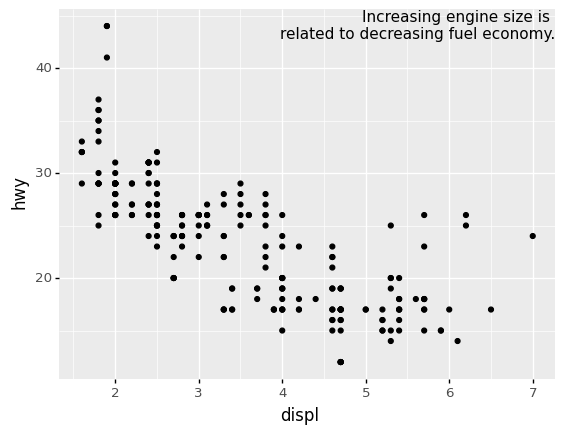

<ggplot: (-9223372036835099216)>

In [26]:
label = pd.DataFrame({"displ": [np.Inf],
                      "hwy": [np.Inf],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

## Во всех этих примерах перенос слов между строками производился вручную с использованием `"\n"`. Можно использовать функцию `fill` из модуля `textwrap`.

In [27]:
from textwrap import fill

print(fill("Increasing engine size is related to decreasing fuel economy.", width=40))

Increasing engine size is related to
decreasing fuel economy.


## Параметры `ha` и `va` определяют местоположение текста. Все девять вариантов – ниже.

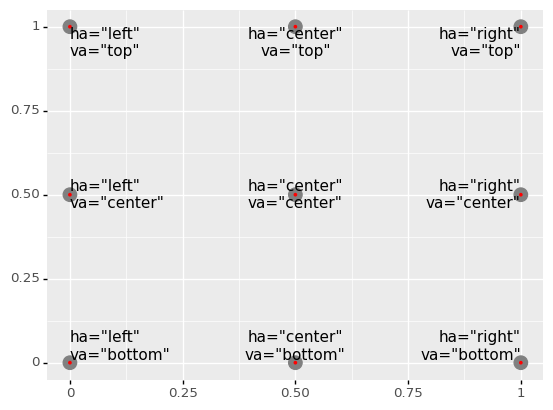

<ggplot: (-9223372036834002964)>

In [28]:
from itertools import product

has = ["left", "center", "right"]
vas = ["top", "center", "bottom"]
xs = [0, 0.5, 1]
ys = [1, 0.5, 0]

df = pd.DataFrame([{"x": xs[x],
                    "y": ys[y],
                    "ha": has[x],
                    "va": vas[y],
                    "label": f"ha=\"{has[x]}\"\nva=\"{vas[y]}\""}
                   for x, y in product(range(3), repeat=2)])

ggplot(df, aes("x", "y")) +\
geom_point(colour="grey", size=5) +\
geom_point(size=0.5, colour="red") +\
geom_text(aes(label="label", ha="ha", va="va")) +\
labs(x=None, y=None)

### Используйте `geom_text()` с положением в бесконечности, чтобы поместить текст в каждый из четырёх углов графика

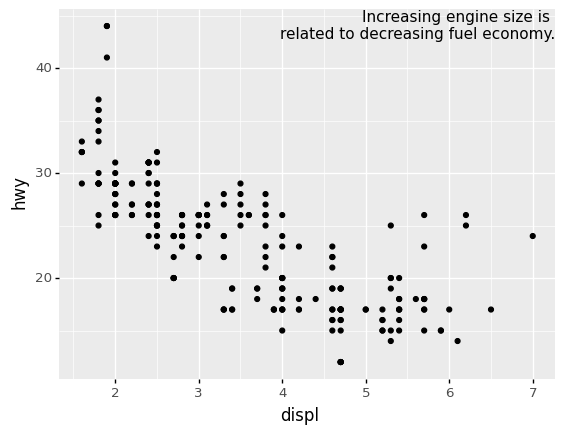

<ggplot: (-9223372036833922464)>

In [33]:
# Type your code here...
label = pd.DataFrame({"displ": [np.Inf],
                      "hwy": [np.Inf],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

### Поэкспериментируйте, как `geom_text()` работает с панелями. Сможете добавить подпись в одну выбранную панель?

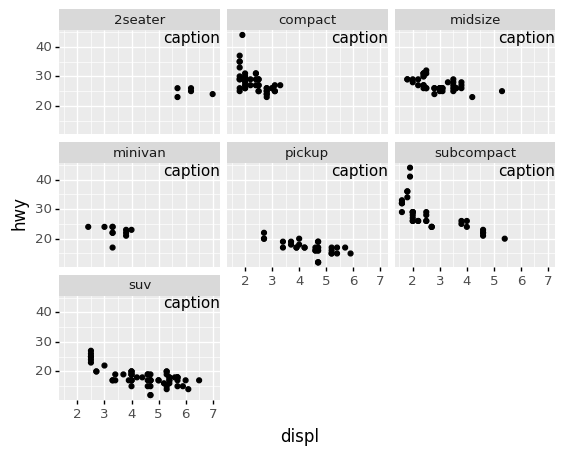

<ggplot: (-9223372036836559604)>

In [42]:
# Type your code here...
label = pd.DataFrame({"displ": [np.Inf],
                      "hwy": [np.Inf],
                      "label": "caption"})


ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right") +\
facet_wrap("class") 

### Используйте `geom_hline()` или `geom_vline()` для обозначения пороговых значений.

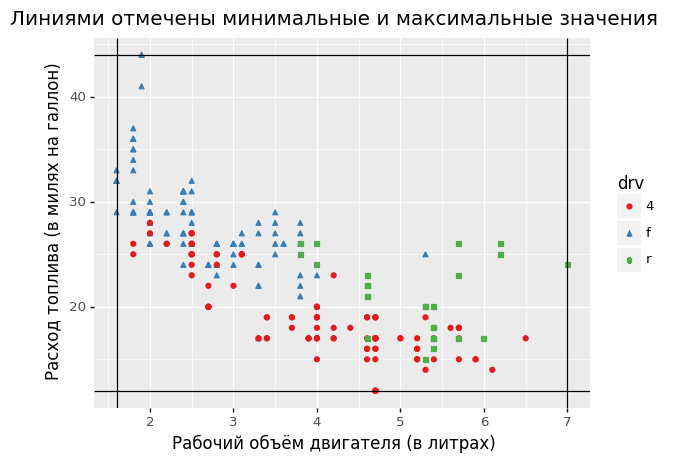

<ggplot: (-9223372036835769992)>

In [53]:
# Type your code here...
# расчертим квадрат
ggplot(mpg, aes("displ", "hwy")) +\
    geom_point(aes(color="drv", shape="drv")) +\
    scale_colour_brewer(type="qual", palette="Set1")+\
    geom_vline(xintercept=mpg.displ.min())+\
    geom_vline(xintercept=mpg.displ.max())+\
    geom_hline(yintercept=mpg.hwy.min())+\
    geom_hline(yintercept=mpg.hwy.max())+\
    labs(x="Рабочий объём двигателя (в литрах)",
         y="Расход топлива (в милях на галлон)",
         title="Линиями отмечены минимальные и максимальные значения")

### Используйте `geom_rect()`, чтобы нарисовать область интереса на графике.

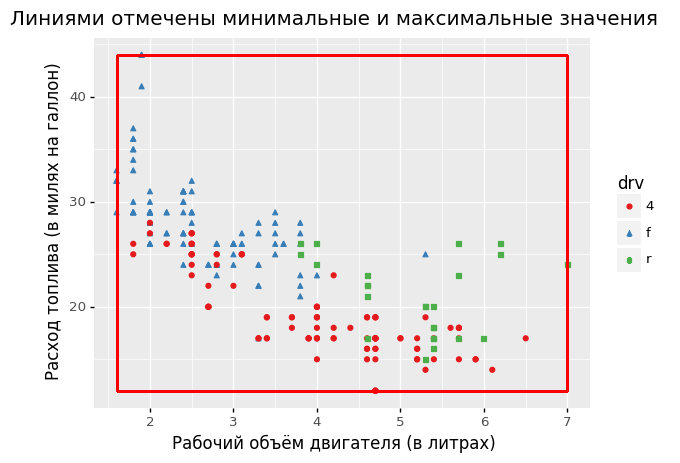

<ggplot: (-9223372036833724640)>

In [64]:
# Type your code here...
# расчертим квадрат
ggplot(mpg, aes("displ", "hwy")) +\
    geom_point(aes(color="drv", shape="drv")) +\
    scale_colour_brewer(type="qual", palette="Set1")+\
    labs(x="Рабочий объём двигателя (в литрах)",
         y="Расход топлива (в милях на галлон)",
         title="Линиями отмечены минимальные и максимальные значения")+\
    geom_rect(mapping=aes(xmin=mpg.displ.min(), xmax=mpg.displ.max(), ymin=mpg.hwy.min(), ymax=mpg.hwy.max()), color="red", alpha=0.001)

### Используйте `geom_segment()`, чтобы нарисовать стрелку на графике.

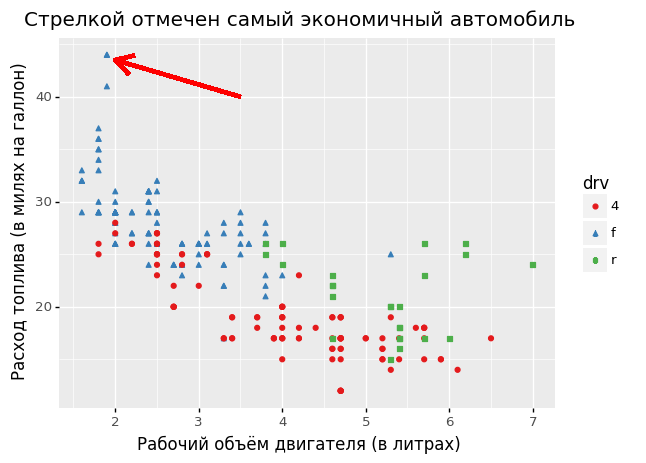

<ggplot: (-9223372036847694880)>

In [80]:
# Type your code here...
ggplot(mpg, aes("displ", "hwy")) +\
    geom_point(aes(color="drv", shape="drv")) +\
    scale_colour_brewer(type="qual", palette="Set1")+\
    labs(x="Рабочий объём двигателя (в литрах)",
         y="Расход топлива (в милях на галлон)",
         title="Стрелкой отмечен самый экономичный автомобиль")+\
    geom_segment(mapping=aes(x=3.5, y=40, xend=2, yend=43.5), arrow=arrow(), size=1.5, color="red")

## Ещё один способ улучшить понятность графиков – выбрать правильные масштабы осей.
## Обратите внимание на разницу между `breaks` и `labels`. Первые – это засечки на осях, а вторые – подписи у этих засечек.

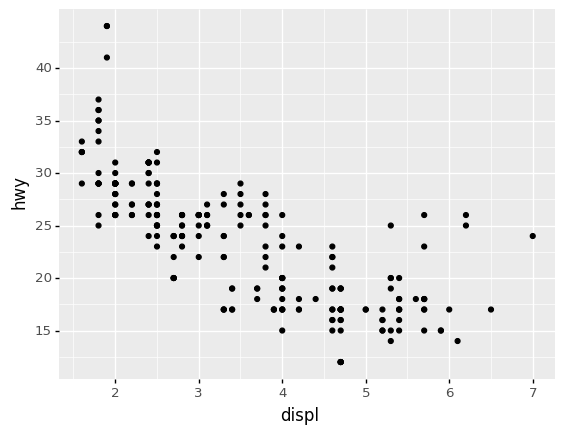

<ggplot: (-9223372036835815116)>

In [85]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
scale_y_continuous(breaks=range(15, 45, 5))

## Можно, например, передать в качестве 'labels' список пустых строк нужного размера.

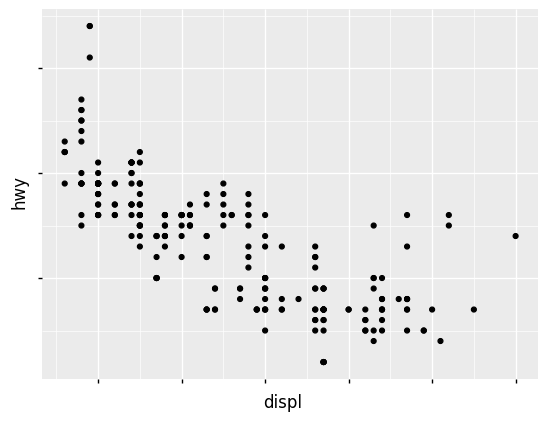

<ggplot: (-9223372036835658232)>

In [86]:
def no_labels(values):
    return [""] * len(values)

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
scale_x_continuous(labels=no_labels) +\
scale_y_continuous(labels=no_labels)

## Можно использовать `breaks` в случае, когда у вас мало конкретных значений, и вам хочется акцентировать внимание именно на них.

In [91]:
presidential.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   name    11 non-null     object        
 1   start   11 non-null     datetime64[ns]
 2   end     11 non-null     datetime64[ns]
 3   party   11 non-null     object        
 4   id      11 non-null     int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 568.0+ bytes


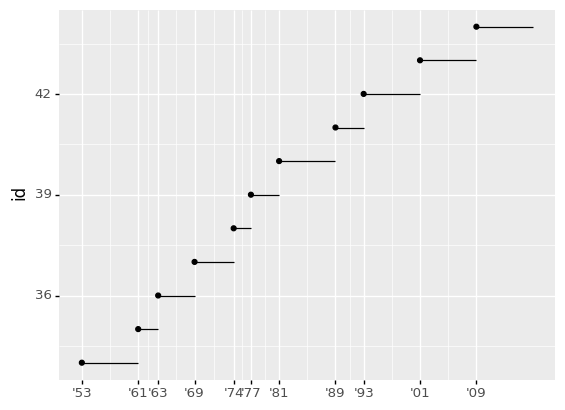

<ggplot: (-9223372036833450904)>

In [87]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_x_date(name="", breaks=presidential.start, date_labels="'%y")

## Местоположение легенды. В целом, всё тривиально.

In [92]:
base = ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class"))

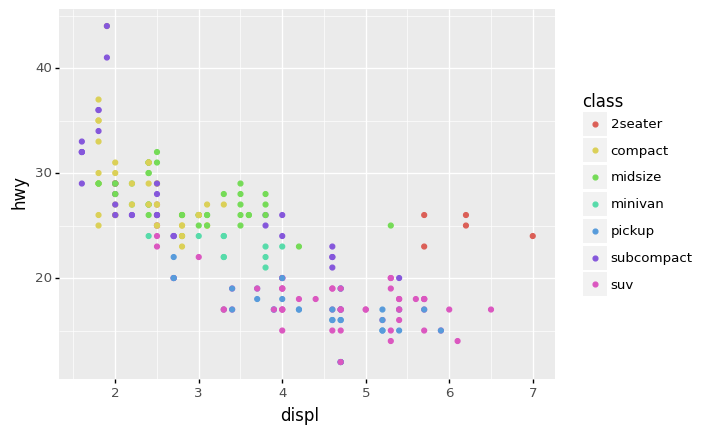

<ggplot: (-9223372036832198508)>

In [93]:
base + theme(legend_position="right")

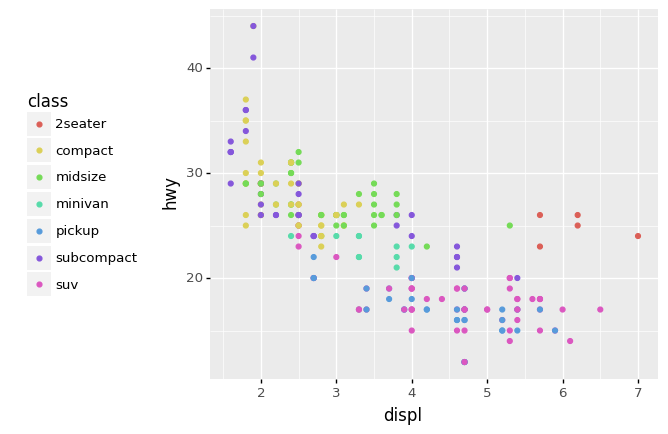

<ggplot: (-9223372036833579072)>

In [94]:
base + theme(subplots_adjust={'left': 0.2}) + theme(legend_position=(0, 0.5))

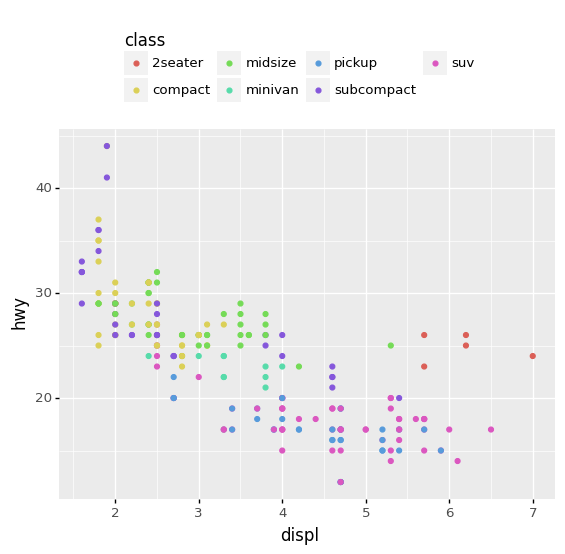

<ggplot: (-9223372036831785808)>

In [95]:
base + theme(legend_position="top")

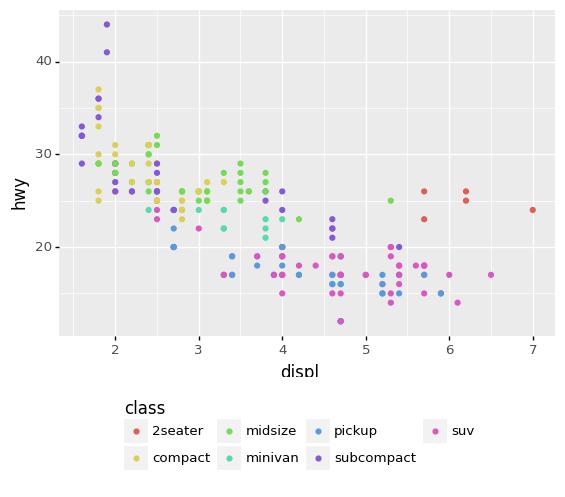

<ggplot: (-9223372036831760460)>

In [96]:
base + theme(subplots_adjust={'bottom': 0.2}, legend_position=(.5, 0), legend_direction='horizontal')

## Можно вообще убрать легенду с помощью `legend_position="none"`.

### С использованием `guides` можно настроить вид легенды ещё более детально.

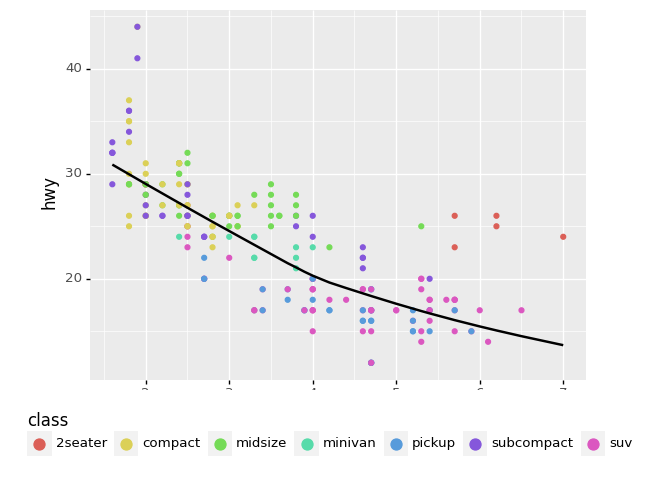

<ggplot: (-9223372036835647912)>

In [97]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
theme(legend_position="bottom") +\
guides(colour=guide_legend(nrow=1, override_aes={"size": 4}))

## Масштаб и шкала осей

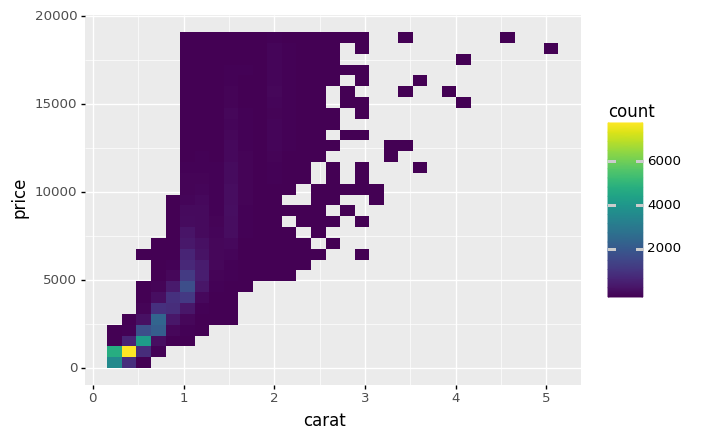

<ggplot: (-9223372036831279796)>

In [98]:
ggplot(diamonds, aes("carat", "price")) +\
geom_bin2d()

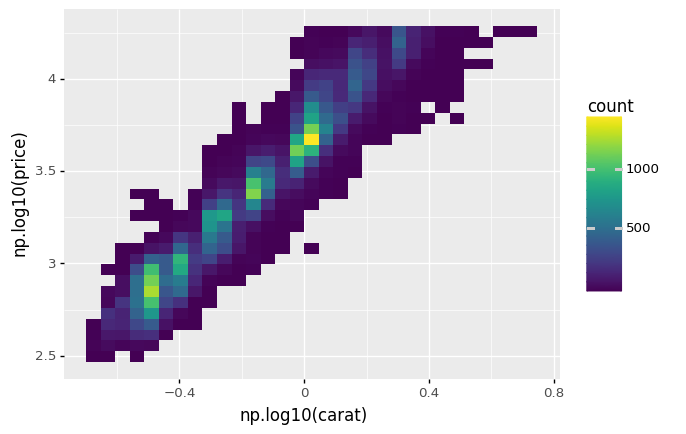

<ggplot: (-9223372036832333684)>

In [99]:
ggplot(diamonds, aes("np.log10(carat)", "np.log10(price)")) +\
geom_bin2d()

## Чтобы значения на осях остались исходными можно воспользоваться переопределением осей: `scale_x_log10()` и `scale_y_log10()`.

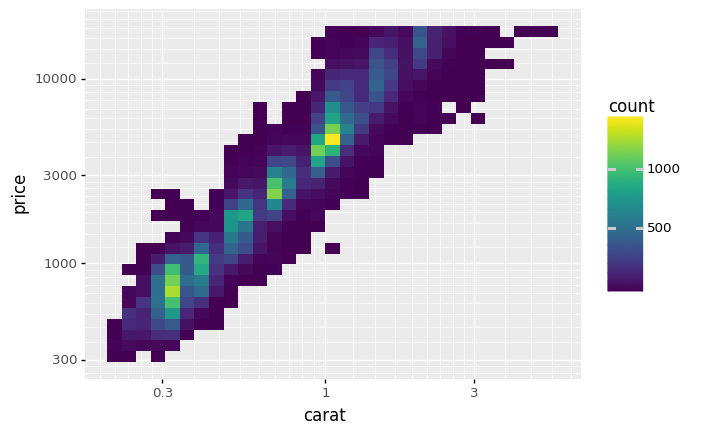

<ggplot: (-9223372036837017368)>

In [100]:
ggplot(diamonds, aes("carat", "price")) +\
geom_bin2d() +\
scale_x_log10() +\
scale_y_log10()

## Также часто переопределяют значения цветов.
## Вот так график выглядит по умолчанию

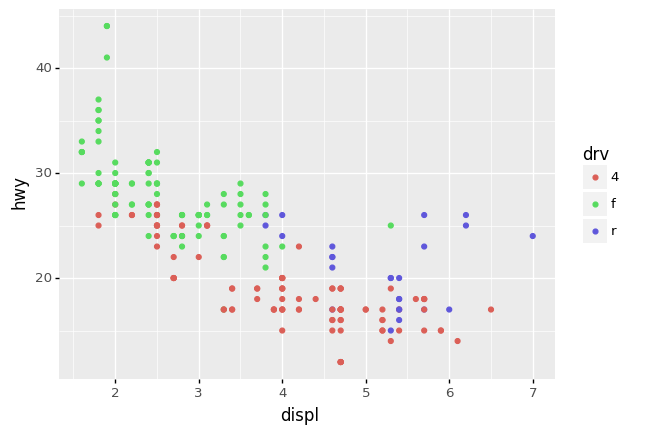

<ggplot: (-9223372036832344208)>

In [101]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv"))

## А так для `palette="Set1"`

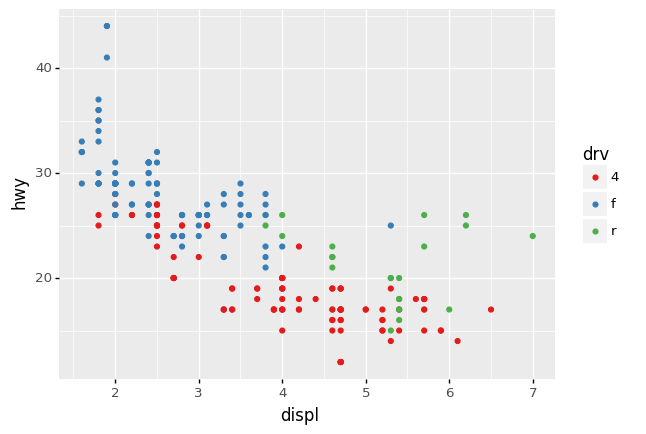

<ggplot: (-9223372036835139448)>

In [102]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv")) +\
scale_colour_brewer(type="qual", palette="Set1")

## А чтобы было ещё более заметно разницу, можно добавить другую форму.

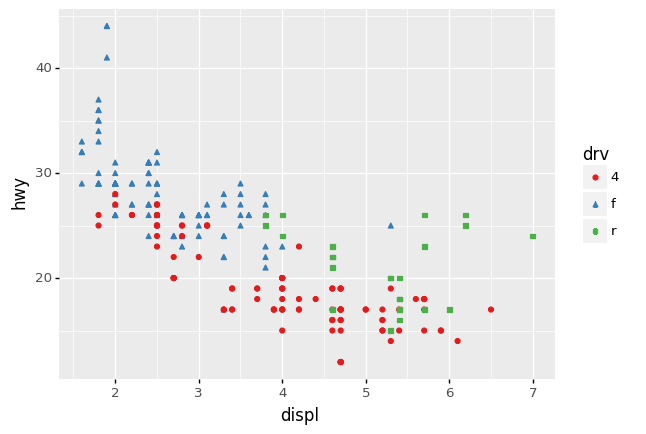

<ggplot: (-9223372036833855524)>

In [103]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv", shape="drv")) +\
scale_colour_brewer(type="qual", palette="Set1")

## Подробнее цветовые схемы описаны тут: <http://colorbrewer2.org/>.

## А ещё можно задать цвета вручную: `scale_colour_manual()`.

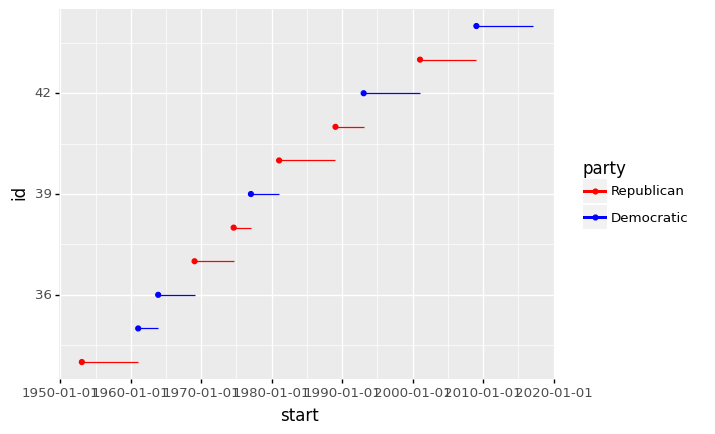

<ggplot: (-9223372036836256508)>

In [104]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id", colour="party")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_colour_manual(values=["red", "blue"], limits=["Republican", "Democratic"])

### "Ну поиграйте с цветами, вы же дизайнер"

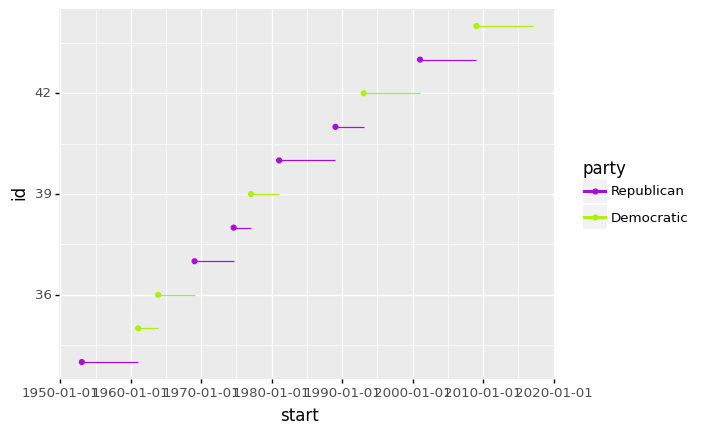

<ggplot: (-9223372036833955920)>

In [120]:
# Type your code here...
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id", colour="party")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_colour_manual(values=["#aa0ddb", "#abf20c"], limits=["Republican", "Democratic"])

## Иногда результат зависит от пределов значений на графике

C:\Users\Kulinar\.conda\envs\dl_2022\lib\site-packages\plotnine\stats\smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


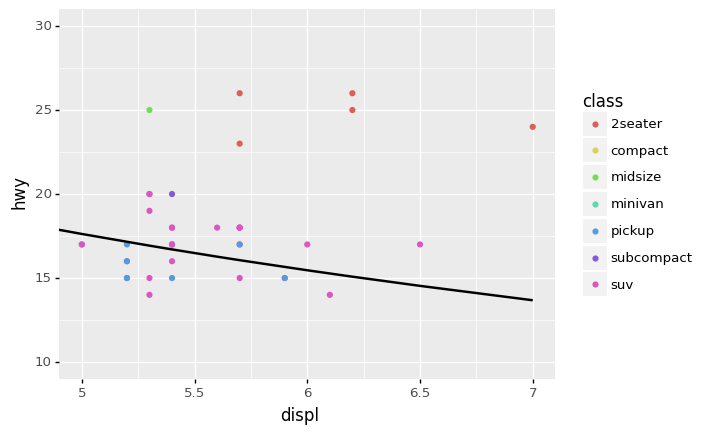

<ggplot: (-9223372036837215644)>

In [121]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth() +\
coord_cartesian(xlim=(5, 7), ylim=(10, 30))

C:\Users\Kulinar\.conda\envs\dl_2022\lib\site-packages\plotnine\stats\smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


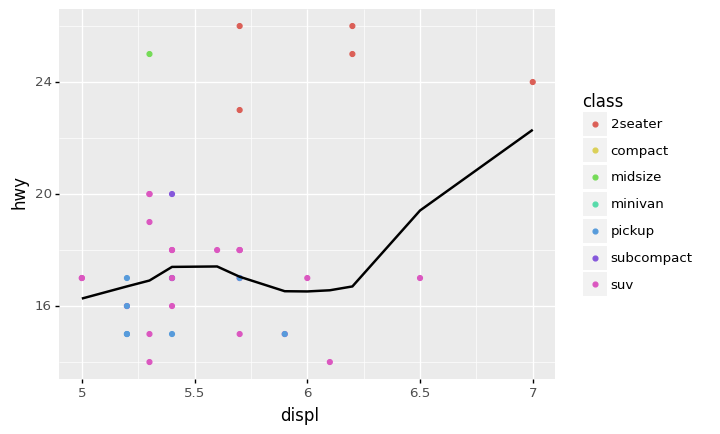

<ggplot: (-9223372036833739768)>

In [122]:
ggplot(mpg.query("5 <= displ <= 7 and 10 <= hwy <= 30"), aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth()

## Когда вы хотите сравнить значения двух графиков с совпадающими осями x и y, имеет смысл зафиксировать макмимальные и минимальные значения на этих осях.

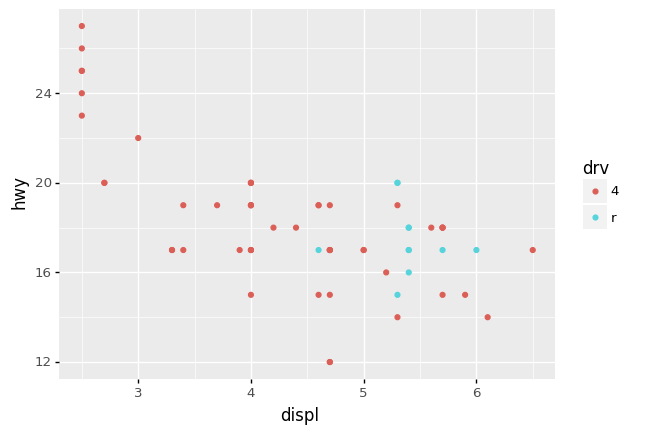

<ggplot: (-9223372036833868840)>

In [123]:
mpg["drv"] = mpg["drv"].astype(str)
suv = mpg[mpg["class"] == "suv"]
compact = mpg[mpg["class"] == "compact"]

ggplot(suv, aes("displ", "hwy", colour="drv")) +\
geom_point()

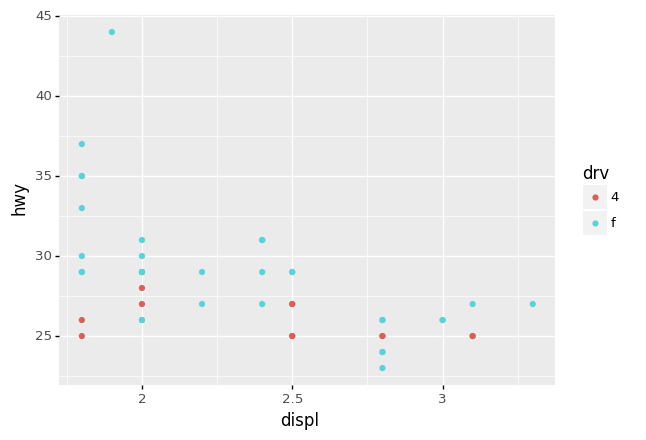

<ggplot: (-9223372036833747800)>

In [124]:
ggplot(compact, aes("displ", "hwy", colour="drv")) +\
geom_point()

## Например, сохранив эти значения в одельную переменную.

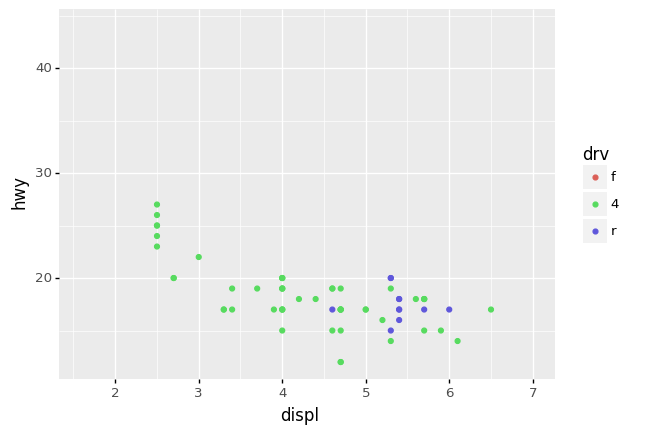

<ggplot: (-9223372036833755420)>

In [125]:
x_scale = scale_x_continuous(limits=(mpg.displ.min(), mpg.displ.max()))
y_scale = scale_y_continuous(limits=(mpg.hwy.min(), mpg.hwy.max()))
col_scale = scale_colour_discrete(limits=mpg.drv.unique())

ggplot(suv, aes("displ", "hwy", colour="drv")) +\
geom_point() +\
x_scale +\
y_scale +\
col_scale

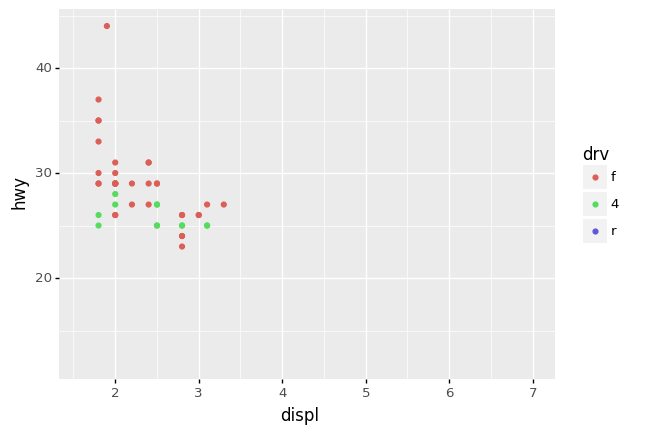

<ggplot: (-9223372036833637080)>

In [126]:
ggplot(compact, aes("displ", "hwy", colour="drv")) +\
geom_point() +\
x_scale +\
y_scale +\
col_scale

## Внешний вид можно менять настройкой тем

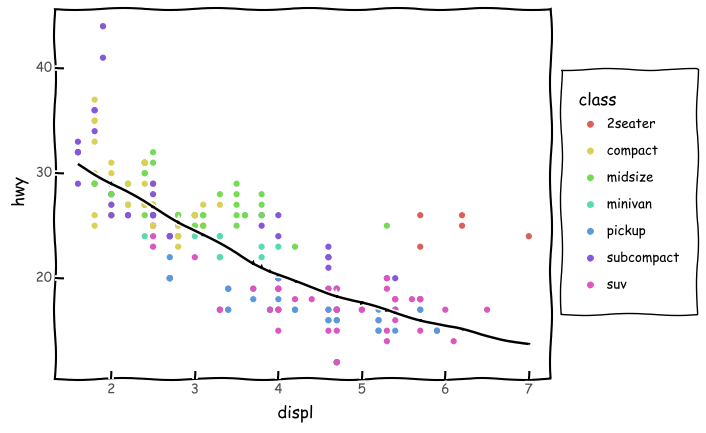

<ggplot: (-9223372036835683476)>

In [127]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth(se=False) +\
theme_xkcd()

## 

## Сохранить последний нарисованный график можно с использованием:
## `_.save("my-plot.pdf")`
## В качестве настроек используются: `width`, `height`, `units`, и `dpi`. 

## Если кто-то в предыдущей лабораторной не сделал творческое задание – самое время это сделать. Кто сделал – тот молодец!